In [1]:
import pandas as pd
import numpy as np

# Upload repairs data
dtp = pd.read_excel('C:/Users/sgulbin/Work/Data/accidents/DTP_data_5_15_2020.xlsx')
dtp['Дата и время ДТП'] = pd.to_datetime(dtp['Дата и время ДТП'], dayfirst=False, errors = 'coerce')
dtp['yyyy-mm'] = dtp['Дата и время ДТП'].dt.strftime('%Y-%m')
dtp['date'] = dtp['Дата и время ДТП'].dt.date
dtp['time'] = dtp['Дата и время ДТП'].dt.time
dtp['weekday'] = dtp['Дата и время ДТП'].dt.day_name()
dtp['day_of_year'] = dtp['Дата и время ДТП'].dt.dayofyear
dtp.sort_values('Дата и время ДТП', inplace=True)
dtp['Телефон водителя'] = dtp['Телефон водителя'].replace(np.nan, 0, regex=True)
dtp['Телефон водителя'] = dtp['Телефон водителя'].apply(int)
dtp.reset_index(drop=True, inplace = True)
dtp['ТС'] = dtp['ТС'].str.replace(' ', '')
dtp = dtp[['Дата и время ДТП','yyyy-mm','date','time','weekday','day_of_year','Регион','Телефон водителя','Виновность', 'ТС', 'Модель автомобиля', 'POOL', 'Тариф','Ремонт не производился','Тип ДТП', 'Вид страхования', 'Пострадавшие','Комментарий','Сумма по заказ-наряду','Выставлено', 'Страховая компания сумма выплаченная']].rename(columns={
    'Дата и время ДТП': 'datetime',
    'yyyy-mm': 'yyyy-mm',
    'date':'date',
    'time':'time',
    'weekday': 'weekday',
    'day_of_year':'day_of_year',
    'Регион': 'region',
    'Телефон водителя': 'phone',
    'Виновность': 'responsibility',
    'ТС': 'license_plate',
    'Модель автомобиля': 'vehicle_model',
    'POOL': 'pool',
    'Тариф': 'tariff',
    'Ремонт не производился': 'no_repair_conducted',
    'Тип ДТП': 'accident_type',
    'Вид страхования': 'insurance_type',
    'Пострадавшие': 'injured',
    'Комментарий': 'description',
    'Сумма по заказ-наряду': 'repair_cost',
    'Выставлено': 'vystavleno',
    'Страховая компания сумма выплаченная': 'insurance_paid_sum'
})
# dtp.to_excel('C:/Users/sgulbin/Work/Data/accidents/accidents_data.xlsx', index = False)
dtp

,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,pool,tariff,no_repair_conducted,accident_type,insurance_type,injured,description,repair_cost,vystavleno,insurance_paid_sum
0,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Москва,79995812517,Виновен,У389ЕА799,...,No,Базовый,No,NaN,NaN,Нет пострадавших,"поврежден передний бампер немного, из гибдд н...",70801.51,58655.0,NaN
1,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Красноярск,79135819270,Виновен,М022ТМ777,...,No,Базовый,No,Столкновение 2-х и более ТС,NaN,Нет пострадавших,NaN,115128.00,30000.0,NaN
2,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Уфа,79603834871,Виновен,Р842РМ777,...,No,Базовый,No,Наезд на препятствие,NaN,Нет пострадавших,NaN,58030.00,30000.0,NaN
3,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Уфа,79869755951,Виновен,В284ХА777,...,No,Базовый,No,Наезд на препятствие,NaN,Нет пострадавших,NaN,138000.00,30000.0,NaN
4,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79990897596,Виновен,М120МЕ799,...,No,Базовый,No,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,Клиент глухонемой ждет в авто нреобходимы меха...,86685.00,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19837,2020-05-14 00:00:00,2020-05,2020-05-14,00:00:00,Thursday,135,ТУЛА,79653284776,Виновен,Е596ТВ799,...,No,Базовый,No,NaN,NaN,NaN,Во время движения клиент задел тс второго учас...,NaN,NaN,NaN
19838,2020-05-14 00:00:00,2020-05,2020-05-14,00:00:00,Thursday,135,Екатеринбург,0,NaN,М105ТМ777,...,No,NaN,No,NaN,NaN,NaN,в тс въехало такси и скрылось,NaN,NaN,NaN
19839,2020-05-14 09:30:00,2020-05,2020-05-14,09:30:00,Thursday,135,Москва,79263626436,Виновен,К983МО799,...,No,Базовый,No,Столкновение 2-х и более ТС,Нет страховки,Нет пострадавших,NaN,NaN,NaN,NaN
19840,2020-05-15 00:00:00,2020-05,2020-05-15,00:00:00,Friday,136,Нижний Новгород,79023035592,NaN,К401ВК799,...,No,NaN,No,NaN,NaN,NaN,со слов клиента: не справился с управлением на...,NaN,NaN,NaN


In [3]:
# Filtering and slicing dtp dataframe

# Slicing dtp dataframe to the period 2020-02-01 - 2020-04-30

# !!! REDUCE ANALYZED PERIOD TO FEBRUARY AND MARCH OF 2020 !!!
# !!! REDUCE ANALYZED PERIOD TO FEBRUARY AND MARCH OF 2020 !!!
# !!! REDUCE ANALYZED PERIOD TO FEBRUARY AND MARCH OF 2020 !!!

dtp = dtp.loc[(dtp.datetime < '2020-05-01')&(dtp.datetime >= '2020-02-01')]
# Leaving only rows with "Vystavleno" is not null
dtp = dtp.loc[(pd.isnull(dtp.vystavleno) == False)&(pd.isnull(dtp.repair_cost) == False)&(dtp.phone != 0)]
# Removing "Vystavleno" = 0.01;0.1;1.0
dtp = dtp.loc[(dtp.vystavleno != 0.01)&(dtp.vystavleno != 0.1)&(dtp.vystavleno != 1.0)&(dtp.vystavleno != 0)]
# Removing pool accidents
dtp = dtp.loc[dtp.pool == 'No']
# Mergin same cars into one category
dtp = dtp.replace({'vehicle_model':{'3D':'Mini','5D':'Mini','FORTWO COUPE':'Smart','FORFOUR':'Smart'}})
dtp

,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,pool,tariff,no_repair_conducted,accident_type,insurance_type,injured,description,repair_cost,vystavleno,insurance_paid_sum
15947,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79220051804,Виновен,С969НО799,...,No,Базовый,No,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,"клиент ехал по улице, загорелся желтый светофо...",265728.27,265728.27,NaN
15951,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79686666642,Розыск,Е558ОН799,...,No,Базовый,No,ДТП со скрытием,Нет страховки,Нет пострадавших,"У меня был взломан аккаунт, как оказалось давн...",158154.37,603700.00,NaN
15953,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79267191220,Виновен,Е825СР799,...,No,Базовый,No,ДТП со скрытием,NaN,Нет пострадавших,NaN,43153.04,42159.63,NaN
15956,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Санкт-Петербург,79262712910,Виновен,Р258АМ797,...,No,Базовый,No,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,при обгоне задела автобус\n\nстарый номер О621...,38722.07,41000.00,NaN
15959,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79254459592,Виновен,О733МЕ799,...,No,Базовый,No,Наезд на препятствие,NaN,NaN,"Погнут диска на левом переднем колесе , колесо...",2830.00,2830.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19766,2020-04-24 16:51:00,2020-04,2020-04-24,16:51:00,Friday,115,Екатеринбург,79220389277,Виновен,С688НО799,...,No,Базовый,Yes,Наезд на препятствие,ОСАГО,Нет пострадавших,при парковке транспортного средства фольксваге...,1581.00,8950.00,NaN
19768,2020-04-25 15:40:00,2020-04,2020-04-25,15:40:00,Saturday,116,Новосибирск,79137635258,Виновен,Х817РУ777,...,No,Базовый,No,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,Клиент выезжал с парковки и задел второй автом...,12895.00,12895.00,NaN
19772,2020-04-26 19:30:00,2020-04,2020-04-26,19:30:00,Sunday,117,Новосибирск,79529291364,Виновен,В346ХА777,...,No,Базовый,No,Наезд на препятствие,ОСАГО,Нет пострадавших,Клиент повторно возьмет ТС на суточную аренду ...,5370.00,7200.00,NaN
19778,2020-04-28 21:38:00,2020-04,2020-04-28,21:38:00,Tuesday,119,Екатеринбург,79041631107,Виновен,А019УА777,...,No,Базовый,No,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,Клиент не заметил авто и произошло столкновение.,90785.00,50000.00,NaN


In [9]:
from datetime import date, timedelta
from datetime import datetime
from pandas.tseries.offsets import MonthEnd
import pandas as pd

def make_int(text):
    return int(text.strip('\u202c'))

df = pd.read_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/users_combined_score_history.csv',\
                usecols = ['login','score','report_date','next_report_date'], converters={'login':make_int})
for i in ['report_date', 'next_report_date']:
    df[i] = pd.to_datetime(df[i], dayfirst=False, errors = 'coerce')
df['next_report_date'] = df['next_report_date'].fillna(pd.to_datetime('today').date())
df['next_report_date'] = pd.to_datetime(df.next_report_date)
df['delta'] = df.next_report_date-df.report_date

df = pd.merge(df, dtp.phone, left_on = 'login', right_on = 'phone', how = 'left')
df = df.loc[pd.isnull(df.phone) == False]

dates = []
scores = []
logins = []
for i in range(len(df.index)):
    for j in range(df.delta.iloc[i].days):
        logins.append(df.login.iloc[i])
        scores.append(df.score.iloc[i])
        dates.append(pd.to_datetime(df.report_date.iloc[i]+timedelta(days = j)).date())

scores = pd.DataFrame({'login':logins,'report_date':dates,'score':scores})
scores

,login,report_date,score
0,79261452986,2019-11-01,0.72
1,79261452986,2019-11-02,0.72
2,79261452986,2019-11-03,0.72
3,79261452986,2019-11-04,0.72
4,79261452986,2019-11-05,0.72
...,...,...,...
255680,79850571716,2020-06-11,0.24
255681,79850571716,2020-06-12,0.24
255682,79850571716,2020-06-13,0.24
255683,79850571716,2020-06-14,0.24


In [10]:
# Adding users score
dtp = pd.merge(dtp, scores, left_on = ['phone','date'], right_on = ['login','report_date'], how = 'left')
# Leaving only rows with score available
dtp = dtp.loc[pd.isnull(dtp.score) == False]
dtp

,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,accident_type,insurance_type,injured,description,repair_cost,vystavleno,insurance_paid_sum,login,report_date,score
0,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79220051804,Виновен,С969НО799,...,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,"клиент ехал по улице, загорелся желтый светофо...",265728.27,265728.27,NaN,7.922005e+10,2020-02-01,0.15
1,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79686666642,Розыск,Е558ОН799,...,ДТП со скрытием,Нет страховки,Нет пострадавших,"У меня был взломан аккаунт, как оказалось давн...",158154.37,603700.00,NaN,7.968667e+10,2020-02-01,0.12
2,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79267191220,Виновен,Е825СР799,...,ДТП со скрытием,NaN,Нет пострадавших,NaN,43153.04,42159.63,NaN,7.926719e+10,2020-02-01,0.33
3,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Санкт-Петербург,79262712910,Виновен,Р258АМ797,...,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,при обгоне задела автобус\n\nстарый номер О621...,38722.07,41000.00,NaN,NaN,NaN,NaN
4,2020-02-01 00:00:00,2020-02,2020-02-01,00:00:00,Saturday,32,Москва,79254459592,Виновен,О733МЕ799,...,Наезд на препятствие,NaN,NaN,"Погнут диска на левом переднем колесе , колесо...",2830.00,2830.00,NaN,7.925446e+10,2020-02-01,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2020-04-24 16:51:00,2020-04,2020-04-24,16:51:00,Friday,115,Екатеринбург,79220389277,Виновен,С688НО799,...,Наезд на препятствие,ОСАГО,Нет пострадавших,при парковке транспортного средства фольксваге...,1581.00,8950.00,NaN,7.922039e+10,2020-04-24,0.07
1316,2020-04-25 15:40:00,2020-04,2020-04-25,15:40:00,Saturday,116,Новосибирск,79137635258,Виновен,Х817РУ777,...,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,Клиент выезжал с парковки и задел второй автом...,12895.00,12895.00,NaN,7.913764e+10,2020-04-25,0.19
1317,2020-04-26 19:30:00,2020-04,2020-04-26,19:30:00,Sunday,117,Новосибирск,79529291364,Виновен,В346ХА777,...,Наезд на препятствие,ОСАГО,Нет пострадавших,Клиент повторно возьмет ТС на суточную аренду ...,5370.00,7200.00,NaN,7.952929e+10,2020-04-26,0.47
1318,2020-04-28 21:38:00,2020-04,2020-04-28,21:38:00,Tuesday,119,Екатеринбург,79041631107,Виновен,А019УА777,...,Столкновение 2-х и более ТС,ОСАГО,Нет пострадавших,Клиент не заметил авто и произошло столкновение.,90785.00,50000.00,NaN,NaN,NaN,NaN


In [7]:
# Creating mapping of score and deductible in hypothetical scenario
deductibles = pd.DataFrame(data=np.arange(0.01,1.01,0.01), columns=['score'])
# criteria = [deductibles['score'].between(0.01, 0.0201),\
#             deductibles['score'].between(0.03, 0.1301),\
#             deductibles['score'].between(0.14, 0.3601),\
#             deductibles['score'].between(0.37, 0.6701),\
#             deductibles['score'].between(0.68, 0.8701),\
#             deductibles['score'].between(0.88, 0.9501),\
#             deductibles['score'].between(0.96, 0.9901),\
#             deductibles['score'].between(1.00, 1.0001)]
criteria = [deductibles['score'].between(0.0, 0.04249999),\
            deductibles['score'].between(0.0425, 0.16999),\
            deductibles['score'].between(0.17, 0.34999),\
            deductibles['score'].between(0.35, 0.554999),\
            deductibles['score'].between(0.554999, 0.7334999),\
            deductibles['score'].between(0.7335, 0.87999),\
            deductibles['score'].between(0.88, 0.974999),\
            deductibles['score'].between(9745, 1.0001)]

def create_deductibles(min_d):
    values = []
    for i in range(1,9):
        values.append(min_d*i**0.5)
    return values

deductibles_prem = [100000,100000,75000,75000,60000,60000,50000,50000]
deductibles_econ_plus = [75000,75000,50000,50000,40000,40000,30000,30000]
deductibles_econ = [60000,60000,50000,45000,35000,35000,30000,30000]
# deductibles_all = [1.0,0.9,0.75,0.5,0.5,0.25,0.1,0.0]
deductibles_all1 = [0.85,0.75,0.66,0.5,0.4,0.3,0.2,0.1]
deductibles_all2 = [0.85,0.8,0.7,0.66,0.55,0.4,0.33,0.25]
deductibles_all3 = [0.85,0.7,0.6,0.5,0.33,0.25,0.15,0.1]

# deductibles['deductible_TO_BE_prem'] = np.select(criteria, deductibles_prem, 0)
# deductibles['deductible_TO_BE_econ_plus'] = np.select(criteria, deductibles_econ_plus, 0)
# deductibles['deductible_TO_BE_econ'] = np.select(criteria, deductibles_econ, 0)
deductibles['deductible_TO_BE1'] = np.select(criteria, deductibles_all1,0)
deductibles['deductible_TO_BE2'] = np.select(criteria, deductibles_all2,0)
deductibles['deductible_TO_BE3'] = np.select(criteria, deductibles_all3,0)
deductibles['score'] = deductibles.score.round(2)
print(deductibles)

prem_cars = ['GLC 250','Mini','320i','Q3','E 200','A3']
econ_plus_cars = ['Kaptur','QASHQAI','Octavia','Smart','Sportage']
econ_cars = ['Polo','Rio','Solaris','Sandero','Rio X-Line','500']

# Adding hypothetical scenario deductibles
tobe = pd.merge(dtp,deductibles, on = 'score', how = 'left')

# Marking vehicle categories
# tobe['deductible_TO_BE'] = np.where(tobe['vehicle_model'].isin(prem_cars),tobe.deductible_TO_BE_prem,\
#                                    np.where(tobe['vehicle_model'].isin(econ_plus_cars),tobe.deductible_TO_BE_econ_plus,\
#                                            np.where(tobe['vehicle_model'].isin(econ_cars),tobe.deductible_TO_BE_econ,tobe.deductible_TO_BE_econ_plus)))
# tobe['deductible_TO_BE'] = tobe['deductible_TO_BE'].astype(float)
tobe

    score  deductible_TO_BE1  deductible_TO_BE2  deductible_TO_BE3
0    0.01               0.85               0.85               0.85
1    0.02               0.85               0.85               0.85
2    0.03               0.85               0.85               0.85
3    0.04               0.85               0.85               0.85
4    0.05               0.75               0.80               0.70
..    ...                ...                ...                ...
95   0.96               0.20               0.33               0.15
96   0.97               0.20               0.33               0.15
97   0.98               0.00               0.00               0.00
98   0.99               0.00               0.00               0.00
99   1.00               0.00               0.00               0.00

[100 rows x 4 columns]


,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,repair_cost,vystavleno,insurance_paid_sum,user_id,login,score,last_scoring_date,deductible_TO_BE1,deductible_TO_BE2,deductible_TO_BE3
0,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79990897596,Виновен,М120МЕ799,...,86685.00,30000.00,NaN,20536695.0,7.999090e+10,0.01,2020-04-01,0.85,0.85,0.85
1,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79633439366,Виновен,Р820ТА777,...,124615.00,124615.00,NaN,20421004.0,7.963344e+10,0.11,2020-03-01,0.75,0.80,0.70
2,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79817838920,Виновен,Р816ТА777,...,11346.00,11346.00,NaN,20348755.0,7.981784e+10,1.00,2020-01-01,0.00,0.00,0.00
3,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79213219298,Виновен,Е326НХ777,...,20367.00,20367.00,NaN,19716139.0,7.921322e+10,0.40,2020-04-01,0.50,0.66,0.50
4,2019-01-02 00:00:00,2019-01,2019-01-02,00:00:00,Wednesday,2,Санкт-Петербург,79778011234,Виновен,Е322НХ777,...,70150.00,30000.00,NaN,19501332.0,7.977801e+10,0.59,2020-04-01,0.40,0.55,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79684763343,Виновен,Е775ОР799,...,12490.58,12490.58,NaN,20461355.0,7.968476e+10,0.01,2020-04-01,0.85,0.85,0.85
6946,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79651705220,Виновен,В154МО799,...,26253.33,26253.00,NaN,423500972.0,7.965171e+10,0.25,2020-05-01,0.66,0.70,0.60
6947,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79053223700,Виновен,М976КМ799,...,137163.10,50000.00,NaN,20077769.0,7.905322e+10,0.06,2020-04-01,0.75,0.80,0.70
6948,2020-03-31 00:00:00,2020-03,2020-03-31,00:00:00,Tuesday,91,Москва,79779080396,Виновен,О124НО799,...,89585.90,50000.00,NaN,565250190.0,7.977908e+10,0.02,2020-05-01,0.85,0.85,0.85


In [8]:
# Ingore warnings

import warnings
warnings.filterwarnings('ignore')

# Easy calc. Leaving only two months: February and March
tobe = tobe.loc[tobe.datetime >= '2020-02-01']
tobe['deductible_AS_IS'] = np.where((tobe.vehicle_model == 'E 200')|(tobe.vehicle_model == 'GLC 250')|(tobe.vehicle_model == '320i'),\
                                   75000,50000)
# tobe['vystavleno_TO_BE'] = np.where(((tobe.vystavleno<tobe.deductible_AS_IS)&(tobe.deductible_TO_BE>=tobe.deductible_AS_IS))|(tobe.vystavleno>tobe.deductible_AS_IS),tobe.vystavleno,\
#                                   np.where((tobe.vystavleno<tobe.deductible_AS_IS)&(tobe.deductible_TO_BE<tobe.deductible_AS_IS),tobe[['vystavleno','deductible_TO_BE']].min(axis=1),\
#                                           np.where((tobe.vystavleno == tobe.deductible_AS_IS)&(tobe.deductible_TO_BE>=tobe.deductible_AS_IS),tobe[['repair_cost','deductible_TO_BE']].min(axis=1),\
#                                                   np.where((tobe.vystavleno == tobe.deductible_AS_IS)&(tobe.deductible_TO_BE<tobe.deductible_AS_IS),tobe.deductible_TO_BE,'error'))))
tobe['vystavleno_TO_BE1'] = np.where(tobe.tariff == 'Сказка',tobe.vystavleno,np.where(tobe.vystavleno > tobe.deductible_AS_IS,\
                                    tobe.vystavleno,np.where(tobe.responsibility == 'Виновен',\
                                                             tobe['deductible_TO_BE1']*tobe['repair_cost'],tobe.vystavleno)))
tobe['vystavleno_TO_BE2'] = np.where(tobe.tariff == 'Сказка',tobe.vystavleno,np.where(tobe.vystavleno > tobe.deductible_AS_IS,\
                                    tobe.vystavleno,np.where(tobe.responsibility == 'Виновен',\
                                                             tobe['deductible_TO_BE2']*tobe['repair_cost'],tobe.vystavleno)))
tobe['vystavleno_TO_BE3'] = np.where(tobe.tariff == 'Сказка',tobe.vystavleno,np.where(tobe.vystavleno > tobe.deductible_AS_IS,\
                                    tobe.vystavleno,np.where(tobe.responsibility == 'Виновен',\
                                                             tobe['deductible_TO_BE3']*tobe['repair_cost'],tobe.vystavleno)))
tobe['vystavleno_TO_BE1'] = tobe['vystavleno_TO_BE1'].astype(float)
tobe['vystavleno_TO_BE2'] = tobe['vystavleno_TO_BE2'].astype(float)
tobe['vystavleno_TO_BE3'] = tobe['vystavleno_TO_BE3'].astype(float)
# tobe['min_compens_probability'] = 0.25
# tobe['compensation_probability_TO_BE'] = -0.192*np.log(tobe['vystavleno_TO_BE']) + 2.6554
# tobe['compensation_probability_AS_IS'] = -0.192*np.log(tobe['vystavleno']) + 2.6554
# tobe['compensation_probability_TO_BE'] = tobe[['min_compens_probability','compensation_probability_TO_BE']].max(axis=1)
# tobe['compensation_probability_AS_IS'] = tobe[['min_compens_probability','compensation_probability_AS_IS']].max(axis=1)
# tobe['compensation_probability_TO_BE'] = tobe['compensation_probability_TO_BE'].astype(float)
# tobe['compensation_probability_AS_IS'] = tobe['compensation_probability_AS_IS'].astype(float)
# tobe['vystavleno_TO_BE_realistic'] = tobe['vystavleno_TO_BE']*tobe['compensation_probability_TO_BE']
# tobe['vystavleno_AS_IS_realistic'] = tobe['vystavleno']*tobe['compensation_probability_AS_IS']

# Building distribution of number of accidents by deductible_TO_BE
# summary = tobe[['datetime','deductible_TO_BE','deductible_AS_IS']]
# summary['deductible_type'] = np.where(summary.deductible_TO_BE>summary.deductible_AS_IS, 'higher deductible',np.where(summary.deductible_TO_BE==summary.deductible_AS_IS,'similar deductible', 'lower deductible'))
# summary = summary.groupby('deductible_type').count()
# summary['fraction_of_total'] = (summary['datetime']/summary['datetime'].sum())*100
# summary = summary[['fraction_of_total']]
summary = tobe
summary['vystavleno_diff1'] = np.where(summary['vystavleno_TO_BE1'] > summary['vystavleno'],'vystavleno_increased',\
                                       np.where(summary['vystavleno_TO_BE1'] == summary['vystavleno'], 'equal', 'vystavleno_reduced'))
summary['vystavleno_diff2'] = np.where(summary['vystavleno_TO_BE2'] > summary['vystavleno'],'vystavleno_increased',\
                                       np.where(summary['vystavleno_TO_BE2'] == summary['vystavleno'], 'equal', 'vystavleno_reduced'))
summary['vystavleno_diff3'] = np.where(summary['vystavleno_TO_BE3'] > summary['vystavleno'],'vystavleno_increased',\
                                       np.where(summary['vystavleno_TO_BE3'] == summary['vystavleno'], 'equal', 'vystavleno_reduced'))
summary1 = summary.groupby('vystavleno_diff1').count()
summary2 = summary.groupby('vystavleno_diff2').count()
summary3 = summary.groupby('vystavleno_diff3').count()



# Printing result
print('Стоим-ть ремонтов:',sum(tobe['repair_cost']))
print('Выставлено AS IS:',sum(tobe['vystavleno']))
# print('Выставлено AS IS realistic:',sum(tobe['vystavleno']))
print('Выставлено TO BE1:',sum(tobe['vystavleno_TO_BE1']))
print('Выставлено TO BE2:',sum(tobe['vystavleno_TO_BE2']))
print('Выставлено TO BE3:',sum(tobe['vystavleno_TO_BE3']))
# print('Выставлено AS IS realistic:',tobe['vystavleno_AS_IS_realistic'].sum())
# print('Выставлено TO BE realistic:',tobe['vystavleno_TO_BE_realistic'].sum())
# print('Эффект динамической франшизы:',sum(tobe['vystavleno_TO_BE_realistic'])-sum(tobe['vystavleno_AS_IS_realistic']))
# print('Годовой эффект динамической франшизы:',(sum(tobe['vystavleno_TO_BE_realistic'])-sum(tobe['vystavleno_AS_IS_realistic']))*6)
# print('Пятилетний эффект динамической франшизы:',(sum(tobe['vystavleno_TO_BE_realistic'])-sum(tobe['vystavleno_AS_IS_realistic']))*30)
print(summary1)
print(summary2)
print(summary3)
tobe.groupby('deductible_TO_BE1').count()
tobe.groupby('deductible_TO_BE2').count()
tobe.groupby('deductible_TO_BE3').count()

Стоим-ть ремонтов: 55456194.21000007
Выставлено AS IS: 57077264.070000075
Выставлено TO BE1: 58686850.08120006
Выставлено TO BE2: 60247127.834900014
Выставлено TO BE3: 57579227.68760009
                      datetime  yyyy-mm  date  time  weekday  day_of_year  \
vystavleno_diff1                                                            
equal                       78       78    78    78       78           78   
vystavleno_increased       225      225   225   225      225          225   
vystavleno_reduced         858      858   858   858      858          858   

                      region  phone  responsibility  license_plate  ...  \
vystavleno_diff1                                                    ...   
equal                     78     78              78             78  ...   
vystavleno_increased     225    225             225            225  ...   
vystavleno_reduced       858    858             858            858  ...   

                      last_scoring_date  deductible_

,datetime,yyyy-mm,date,time,weekday,day_of_year,region,phone,responsibility,license_plate,...,last_scoring_date,deductible_TO_BE1,deductible_TO_BE2,deductible_AS_IS,vystavleno_TO_BE1,vystavleno_TO_BE2,vystavleno_TO_BE3,vystavleno_diff1,vystavleno_diff2,vystavleno_diff3
deductible_TO_BE3,,,,,,,,,,,,,,,,,,,,,
0.15,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
0.25,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
0.33,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
0.50,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
0.60,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
0.70,373,373,373,373,373,373,373,373,373,373,...,373,373,373,373,373,373,373,373,373,373
0.85,363,363,363,363,363,363,363,363,363,363,...,363,363,363,363,363,363,363,363,363,363


In [59]:
tobe.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/tobe.csv')

In [53]:
# Avg repair cost by vehicle model
import warnings
warnings.filterwarnings('ignore')

test = pd.merge(dtp,deductibles, on = 'score', how = 'left')
test = test.loc[(test.repair_cost > 7500)&(test.pool == 'No')]
test['category'] = np.where(test['vehicle_model'].isin(prem_cars),'prem',\
                                   np.where(test['vehicle_model'].isin(econ_plus_cars),'econ+',\
                                           np.where(test['vehicle_model'].isin(econ_cars),'econ','econ+')))
test = test[['repair_cost','category','deductible_TO_BE_prem','vehicle_model']]
pvt = pd.pivot_table(test, index = test.deductible_TO_BE_prem, columns = test.category, aggfunc = 'mean')
pvt.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/distribution2.csv')
mean = test.groupby('vehicle_model').mean().sort_values('repair_cost', ascending = False)
count = test.groupby('vehicle_model').count()
output = pd.merge(mean, count, left_index = True, right_index = True, how = 'left')
output

,repair_cost_x,deductible_TO_BE_prem_x,repair_cost_y,category,deductible_TO_BE_prem_y
vehicle_model,,,,,
GLC 250,236088.952000,86000.000000,10,10,10
320i,146237.368584,86061.946903,226,226,226
Q3,140761.236000,80000.000000,5,5,5
E 200,106259.572308,85384.615385,13,13,13
A3,103778.987143,90000.000000,14,14,14
Mini,102979.759200,89400.000000,25,25,25
Kaptur,89850.661989,84431.818182,176,176,176
QASHQAI,85859.278585,89669.811321,106,106,106
Octavia,76464.476957,88043.478261,46,46,46


(0, 50000)

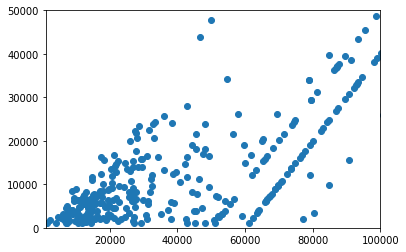

In [51]:
# Sandbox
# test = tobe[['vystavleno','repair_cost','vystavleno_TO_BE','vystavleno_TO_BE_realistic']]
# test = test.loc[(test.vystavleno/test.repair_cost > 2.0)&(test.repair_cost > 7500)]
# print(test.repair_cost.sum())
# print(test.vystavleno.sum())
# print(tobe.vystavleno.sum())
# test
import matplotlib.pyplot as plt
tobe['delta'] = tobe['repair_cost']-tobe['vystavleno_TO_BE']
grouped = tobe.groupby('repair_cost').sum()
grouped = grouped.loc[grouped.delta > 1000]
grouped = grouped[['delta']]
plt.scatter(grouped.index, grouped.delta)
plt.xlim(1000,100000)
plt.ylim(0,50000)
#          range = (1000,100000),
#         histtype = 'stepfilled',
#         bins = 100,
#                label = 'delta',
#                alpha = 0.7)
# plt.legend()

In [66]:
# deductibles['a'] = [1,2,3,4,5,6,7,8]
# test = dtp.loc[(dtp.vystavleno == 0.01)&(dtp.repair_cost > 3000)]
# test = dtp.groupby(dtp.tariff).count()
test = tobe.loc[tobe.vystavleno <=1.0]
# test.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/vystavleno_less_1.csv', encoding = 'utf-8-sig')
# tobe.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/tobe.csv', encoding = 'utf-8-sig',index=False)
test = tobe.loc[(tobe.vystavleno/tobe.repair_cost > 2)&(tobe.repair_cost > 30000)]
# test.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/vystavleno_much_higher_repair_cost.csv', encoding = 'utf-8-sig', index = False)
test = dtp.loc[(dtp.responsibility == 'Не виновен')&(dtp.vystavleno > 1000)]
# test.to_csv('C:/Users/sgulbin/Work/Analysis/DynamicDeductible/not_guilty_vystavleno.csv', \
# encoding = 'utf-8-sig', index = False)
tobe.groupby('deductible_TO_BE').mean()

,day_of_year,phone,repair_cost,vystavleno,insurance_paid_sum,user_id,login,score,deductible_AS_IS,vystavleno_TO_BE
deductible_TO_BE,,,,,,,,,,
0.10,38.000000,7.903685e+10,5766.880000,5767.000000,NaN,9.500007e+07,7.903685e+10,0.960000,50000.000000,576.688000
0.25,48.000000,7.945768e+10,93584.260000,35732.000000,NaN,2.496882e+07,7.945768e+10,0.892500,62500.000000,23396.065000
0.50,60.679245,7.943448e+10,34254.958742,34767.019623,10300.000000,1.592582e+08,7.943448e+10,0.547987,51572.327044,27940.017736
0.75,57.847222,7.942089e+10,45405.183639,51357.604611,14572.610000,1.752002e+08,7.942089e+10,0.228167,51458.333333,52447.242833
0.90,59.126147,7.946282e+10,46323.485940,46492.684702,124008.963333,1.920363e+08,7.946282e+10,0.069931,51376.146789,52988.375800
1.00,59.659341,7.950304e+10,59173.496410,61810.162711,NaN,2.190107e+08,7.950304e+10,0.013443,50915.750916,75751.029853
